In [1]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
with open('news', 'r') as f:
    text = f.read()
    news = text.split("\n\n")
    v=0
    count = {'sport': 0, 'world': 0, "us": 0, "business": 0, "health": 0, "entertainment": 0, "sci_tech": 0}
    for news_item in news:
#         if(v == loop):
#             break
        lines = news_item.split("\n")
        #print(lines[6])
        file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
        count[lines[6]] = count[lines[6]] + 1
        file_to_write.write(news_item)  # python will convert \n to os.linesep
        file_to_write.close()
    print(count)


FileNotFoundError: [Errno 2] No such file or directory: 'data/sport/0.txt'

In [22]:
import pandas
import glob

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["data/sport/*.txt", "data/world/*.txt","data/us/*.txt","data/business/*.txt","data/health/*.txt","data/entertainment/*.txt","data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []


for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

{'data': "court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.",
 'flag': 0}

In [23]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print("Total data in training set ",training_data.data.shape)
l = ['sport', 'world', "us", "business", "health", "entertainment", "sci_tech"]

for i in range(0,7):
    place =  (training_data.flag == i)
    count[l[i]] = training_data[place].count()
print(count)
#place2 =(training_data.flag == 1)
#print(place2)


Total data in training set  (32602,)
{'health': data    1851
flag    1851
dtype: int64, 'entertainment': data    3286
flag    3286
dtype: int64, 'us': data    4783
flag    4783
dtype: int64, 'business': data    5366
flag    5366
dtype: int64, 'sci_tech': data    2872
flag    2872
dtype: int64, 'sport': data    8189
flag    8189
dtype: int64, 'world': data    6255
flag    6255
dtype: int64}


In [43]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [32]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [33]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Messi joins other football team"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])






sport


In [34]:
import matplotlib.pyplot as plt 
accuracy=[]
f1=[]
prec=[]
rec=[]

Accuracy: 0.7729112992270887
F1_Score: 0.6923948253425513
Precision Score: 0.8237931263423601
Recall Score: 0.6680392369171569
sport  -  entertainment
entertainment  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
us  -  us
business  -  business
business  -  business
sport  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
us  -  health
business  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
us  -  us
us  -  us
world  -  entertainment
sport  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
us  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
sport  -  sport

us  -  us
sport  -  sport
business  -  business
business  -  business
health  -  health
sport  -  health
world  -  world
world  -  world
us  -  health
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
business  -  business
us  -  us
sport  -  sport
business  -  business
us  -  us
sport  -  entertainment
sport  -  sport
entertainment  -  entertainment
business  -  business
sport  -  entertainment
sport  -  sport
us  -  us
entertainment  -  entertainment
business  -  business
world  -  world
world  -  world
sport  -  sport
world  -  world
us  -  us
sci_tech  -  sci_tech
sport  -  sport
world  -  world
world  -  world
us  -  us
sport  -  sport
business  -  sci_tech
world  -  world
sport  -  sport
world  -  world
business  -  business
sport  -  sport
world  -  world
us  -  business
sport  -  sport
business  -  business
sport  -  health
world  -  world
world  -  world
world  -  world
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
business  -  busin

entertainment  -  entertainment
sport  -  sport
business  -  business
us  -  health
sport  -  sport
sport  -  sport
us  -  us
business  -  business
sport  -  sport
world  -  world
world  -  world
business  -  business
world  -  world
sport  -  sport
world  -  us
business  -  us
world  -  world
us  -  entertainment
world  -  business
business  -  sport
business  -  business
business  -  business
world  -  world
world  -  us
business  -  sci_tech
entertainment  -  health
world  -  world
sport  -  sport
world  -  world
world  -  world
business  -  health
sport  -  sport
sport  -  sport
business  -  business
sport  -  entertainment
business  -  business
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
business  -  business
sport  -  entertainment
us  -  us
sport  -  sport
sci_tech  -  business
sport  -  sport
business  -  business
sport  -  us
us  -  us
business 

business  -  business
business  -  business
sport  -  sport
sport  -  sport
business  -  business
sport  -  sci_tech
sci_tech  -  sci_tech
world  -  world
sport  -  sport
world  -  world
business  -  business
sport  -  sport
us  -  us
world  -  world
business  -  business
business  -  business
sport  -  sport
sport  -  sport
world  -  entertainment
business  -  us
health  -  health
world  -  world
business  -  world
world  -  world
us  -  sport
us  -  entertainment
sport  -  world
entertainment  -  entertainment
business  -  business
us  -  us
world  -  world
us  -  us
entertainment  -  entertainment
business  -  business
sport  -  entertainment
world  -  world
business  -  us
business  -  business
world  -  world
us  -  us
business  -  entertainment
business  -  business
world  -  world
sport  -  sci_tech
entertainment  -  entertainment
entertainment  -  entertainment
business  -  sci_tech
world  -  world
sport  -  sport
business  -  health
sport  -  sport
sport  -  entertainment
sci_

sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
world  -  world
business  -  sci_tech
entertainment  -  entertainment
sci_tech  -  entertainment
business  -  business
business  -  sci_tech
world  -  world
entertainment  -  entertainment
world  -  world
entertainment  -  us
sport  -  entertainment
sport  -  sport
us  -  us
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
world  -  business
business  -  business
world  -  world
us  -  health
world  -  world
world  -  world
business  -  business
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
business  -  business
world  -  world
sport  -  entertainment
business  -  business
business  -  business
business  -  business
business  -  business
us  -  us
sport  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
sport  -  world
sport  -  sport
sport  -  us
sport  -  sport
sport  -  sport
world  -  us
business  -  business
world  -  sci_tech
entertainment  -  entertainme

us  -  us
business  -  world
business  -  health
business  -  business
us  -  us
world  -  business
world  -  world
us  -  us
sport  -  sport
sci_tech  -  sci_tech
world  -  world
world  -  world
world  -  world
world  -  world
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sci_tech  -  sci_tech
world  -  world
sci_tech  -  business
world  -  world
sport  -  entertainment
business  -  business
business  -  sci_tech
sport  -  sport
world  -  world
sport  -  us
world  -  world
world  -  world
sport  -  sport
entertainment  -  world
world  -  sport
world  -  world
business  -  business
us  -  us
sci_tech  -  business
us  -  us
sport  -  sport
sport  -  sport
world  -  world
health  -  health
sport  -  sport
business  -  business
business  -  business
health  -  health
world  -  world
sport  -  entertainment
us  -  us
business  -  entertainment
health  -  health
entertainment  -  entertainment
business  -  world
sport  -  sport
us  -  us
health  -  health
s

world  -  world
business  -  business
us  -  sci_tech
world  -  world
business  -  sci_tech
us  -  us
business  -  business
business  -  sci_tech
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
sport  -  entertainment
business  -  us
sci_tech  -  sci_tech
us  -  health
us  -  us
world  -  world
sport  -  sport
world  -  world
world  -  us
business  -  us
business  -  sci_tech
business  -  business
sport  -  sport
business  -  business
sport  -  sport
health  -  health
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
world  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
business  -  sci_tech
sport  -  entertainment
business  -  business
sport  -  sport
business  -  business
sport  -  sport
world  -  world
entertainment  -  entertainment
sport  -  sport
business  -  business
entertainment  -  entertainment

sport  -  sport
sport  -  entertainment
world  -  world
business  -  business
sport  -  sport
entertainment  -  entertainment
health  -  health
business  -  business
business  -  business
world  -  world
business  -  world
world  -  world
sport  -  us
sport  -  sport
world  -  health
sport  -  sport
world  -  world
world  -  world
business  -  business
world  -  world
business  -  sci_tech
entertainment  -  entertainment
business  -  business
us  -  sci_tech
sport  -  sport
us  -  us
business  -  business
world  -  world
world  -  health
business  -  us
sport  -  sport
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
sport  -  sport
business  -  business
business  -  business
business  -  business
us  -  us
sport  -  sport
business  -  business
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  health
entertainment  -  entertainment
sport  -  sport
business  -  business
business  -  business
spo

sport  -  sport
business  -  business
world  -  world
business  -  business
sport  -  sport
us  -  business
business  -  health
business  -  business
business  -  business
entertainment  -  entertainment
world  -  world
world  -  sci_tech
world  -  world
business  -  world
business  -  business
entertainment  -  entertainment
sport  -  entertainment
sport  -  us
world  -  world
entertainment  -  entertainment
business  -  sci_tech
world  -  world
us  -  us
world  -  health
business  -  business
business  -  business
business  -  sci_tech
sport  -  sport
business  -  sci_tech
sport  -  sport
us  -  us
business  -  sci_tech
us  -  us
sport  -  sport
business  -  business
us  -  us
business  -  sci_tech
us  -  us
sport  -  sport
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
sport  -  sport
world  -  world
us  -  us
business  -  business
health  -  health
health  -  health
entertainment  -  entertainment
sport  -  entertainment
sport  -  sport
busine

business  -  business
sport  -  sci_tech
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
business  -  sci_tech
entertainment  -  entertainment
sci_tech  -  business
business  -  business
us  -  us
sport  -  health
sci_tech  -  sci_tech
business  -  business
sport  -  sport
business  -  sci_tech
sport  -  sport
world  -  world
entertainment  -  health
sport  -  sport
business  -  us
sport  -  sport
business  -  business
sport  -  sport
business  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
world  -  world
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
business  -  sci_tech
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
business  -  entertainment
world  -  world
sport  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
business  -  us
business  -  business
entertainment  -  entertainment
us  -  us
sci_t

sport  -  sport
business  -  business
world  -  world
sport  -  us
sport  -  sport
business  -  us
world  -  world
world  -  world
us  -  us
sci_tech  -  business
business  -  business
business  -  business
business  -  business
entertainment  -  business
world  -  entertainment
sport  -  entertainment
sport  -  sport
world  -  world
business  -  business
sport  -  sport
sci_tech  -  sci_tech
entertainment  -  entertainment
world  -  health
business  -  business
world  -  world
world  -  world
health  -  health
sport  -  sport
health  -  health
world  -  world
business  -  business
world  -  world
sport  -  us
sport  -  sport
business  -  business
world  -  world
us  -  us
sport  -  sport
world  -  world
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
business  -  business
sport  -  us
sport  -  sport
world  -  world
us  -  health
us  -  us
us  -  us
sport  -  sport
world  -  us
sport  -  sport
business  -  business
sport  -  entertainment
us  -  us
sport  -  s

world  -  world
sport  -  sport
us  -  us
us  -  us
sport  -  sport
sport  -  sport
world  -  world
world  -  sci_tech
sport  -  sci_tech
business  -  sci_tech
us  -  us
sport  -  health
world  -  world
sport  -  sport
sport  -  sport
business  -  business
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
world  -  world
business  -  business
world  -  world
us  -  us
world  -  sci_tech
business  -  health
sport  -  sport
sci_tech  -  sci_tech
business  -  world
business  -  business
sport  -  sport
world  -  world
sport  -  sport
business  -  sci_tech
world  -  world
business  -  business
health  -  health
sport  -  sport
us  -  us
business  -  business
us  -  us
sport  -  entertainment
sport  -  sport
sport  -  sport
business  -  business
sci_tech  -  business
world  -  world
entertainment  -  entertainment
sci_tech  -  sci_tech
us  -  us
business  -  business
us  -  business
world  -  world
us  -  sci_tech
sport  -  world
business  -  business
ent

world  -  world
world  -  world
sport  -  sport
sport  -  sport
world  -  world
world  -  us
sport  -  sport
world  -  health
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  us
business  -  business
world  -  us
sport  -  sport
world  -  sci_tech
sport  -  sport
sport  -  sport
business  -  sport
sport  -  sport
world  -  world
business  -  sci_tech
sport  -  sport
world  -  business
world  -  world
world  -  us
business  -  business
sport  -  sport
sport  -  entertainment
sport  -  business
sport  -  sport
world  -  world
business  -  business
world  -  world
sport  -  entertainment
world  -  world
sport  -  health
business  -  sci_tech
us  -  us
sport  -  sport
sport  -  sport
sport  -  sport
health  -  health
sport  -  sport
business  -  world
sport  -  sport
world  -  world
world  -  world
sport  -  sport
sport  -  sport
us  -  us
business  -  business
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
us  -  us
business  -  business

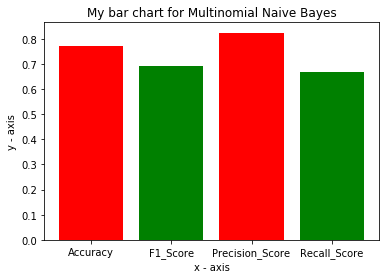

In [35]:
predicted = loaded_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,predicted))
a=(accuracy_score(y_test,predicted))
print('F1_Score:',f1_score(y_test, predicted, average="macro"))
b=(f1_score(y_test, predicted, average="macro"))
print('Precision Score:',precision_score(y_test, predicted, average="macro"))
c=(precision_score(y_test, predicted, average="macro"))
print('Recall Score:',recall_score(y_test, predicted, average="macro"))
d=(recall_score(y_test, predicted, average="macro"))


accuracy.append(a)
f1.append(b)
prec.append(c)
rec.append(d)

result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

#graph implementation

left = [1, 2, 3, 4] 

  
# heights of bars 

height = [a, b, c, d] 

  
# labels for bars 

tick_label = ['Accuracy', 'F1_Score', 'Precision_Score', 'Recall_Score'] 

  
# plotting a bar chart 

plt.bar(left, height, tick_label = tick_label, 

        width = 0.8, color = ['red', 'green']) 

  
# naming the x-axis 

plt.xlabel('x - axis') 
# naming the y-axis 

plt.ylabel('y - axis') 
# plot title 

plt.title('My bar chart for Multinomial Naive Bayes') 

  
# function to show the plot 
plt.show() 
    


In [36]:
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

[[2006   10   11    7    0    0    0]
 [  22 1471   18   57    0    8    0]
 [ 103  139  836  117    0    7    5]
 [  54   34   36 1136    0   11   26]
 [  81   62   66   95  150    5    3]
 [ 266   38   25   28    0  497    5]
 [  99   71   41  289    6    6  204]]


In [37]:
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

clf_neural.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

Accuracy: 0.8256655625076678
F1_Score: 0.7924755383575716
Precision Score: 0.7938954555443624
Recall Score: 0.7913551636702282
entertainment  -  entertainment
entertainment  -  world
entertainment  -  entertainment
business  -  business
health  -  sport
us  -  us
business  -  business
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
entertainment  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
entertainment  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
us  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
world  -  busi

us  -  us
sci_tech  -  sport
sci_tech  -  business
us  -  sci_tech
sport  -  sport
us  -  entertainment
us  -  us
entertainment  -  entertainment
world  -  world
sport  -  sport
entertainment  -  sci_tech
entertainment  -  entertainment
sci_tech  -  us
entertainment  -  entertainment
sport  -  sport
health  -  health
us  -  us
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sci_tech
world  -  world
sport  -  sport
entertainment  -  entertainment
world  -  world
sport  -  sport
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
health  -  health
sport  -  sport
business  -  business
world  -  us
sport  -  sport
us  -  us
business  -  business
business  -  business
sci_tech  -  sci_tech
business  -  business
entertainment  -  entertainment
sport  -  sport
us  -  us
sport  -  sport
sci_tech  -  business
business  -  sci_tech
business  -  business
world  -  world
world  -  world
entertainment  -  entertainment
world  -  health
entertainment  -  entertainment
sport  -

entertainment  -  entertainment
sport  -  sport
sci_tech  -  business
health  -  health
sport  -  sport
sport  -  sport
us  -  us
business  -  business
sport  -  sport
world  -  world
world  -  world
business  -  business
world  -  world
sport  -  sport
world  -  us
business  -  us
world  -  world
us  -  entertainment
world  -  business
business  -  sport
us  -  business
business  -  business
world  -  world
world  -  us
business  -  sci_tech
entertainment  -  health
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sci_tech  -  business
business  -  business
entertainment  -  sport
business  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
business  -  business
sci_tech  -  entertainment
sport  -  us
sport  -  sport
sci_tech  -  business
sport  -  sport
us  -  business
us  -  us
us  -  us


us  -  health
world  -  world
us  -  world
business  -  world
sport  -  sport
business  -  sci_tech
sport  -  sport
sport  -  sport
entertainment  -  entertainment
world  -  world
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
business  -  health
business  -  business
world  -  world
sport  -  sport
us  -  us
us  -  us
us  -  us
sci_tech  -  business
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
world  -  world
business  -  business
business  -  business
health  -  health
world  -  world
us  -  us
world  -  world
business  -  business
us  -  us
business  -  business
world  -  world
world  -  world
health  -  health
sci_tech  -  sci_tech
business  -  business
business  -  business
world  -  world
world  -  world
world  -  business
business  -  business
sport  -  sport
world  -  world
us  -  us
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
us  -  us
world  -  us
us  -  us
us  -  us
busi

sci_tech  -  sci_tech
us  -  us
sport  -  sport
us  -  us
world  -  world
business  -  business
world  -  world
health  -  health
business  -  business
health  -  health
business  -  business
us  -  world
sport  -  sport
world  -  world
health  -  health
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
business  -  business
sci_tech  -  sci_tech
health  -  health
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
sport  -  sport
us  -  us
sport  -  sport
us  -  us
business  -  us
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
business  -  health
entertainment  -  entertainment
sport  -  sport
business  -  business
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
world  -  world
business  -  business
business  -  business
health  -  health
sport  -  sport
sport  -  sport
entertainment  -  sport
sport  -  sci_tech
sport  -  sport
sport  -  sport
world  -  us
sport  -  sport
healt

world  -  sci_tech
business  -  business
sport  -  sport
us  -  us
entertainment  -  business
us  -  us
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
world  -  world
health  -  us
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
entertainment  -  entertainment
business  -  sci_tech
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
world  -  world
world  -  world
entertainment  -  entertainment
sport  -  sport
business  -  sci_tech
world  -  world
sport  -  sport
entertainment  -  business
sport  -  sport
sci_tech  -  sci_tech
entertainment  -  entertainment
business  -  business
business  -  business
world  -  world
sci_tech  -  us
sport  -  entertainment
sport  -  sport
health  -  health
business  -  us
entertainment  -  entertainment
health  -  sport
sport  -  sport
business  -  business
world  -  us
sport  -  sport
world  -  world
world  -  world
us  -  business
entertainment  -  entertainment
us  -  sport
world  -  us
sport

entertainment  -  entertainment
sci_tech  -  sci_tech
business  -  business
health  -  health
sport  -  sport
sport  -  sport
world  -  health
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
health  -  health
us  -  us
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sci_tech  -  sci_tech
us  -  us
world  -  world
sport  -  sport
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
world  -  world
us  -  sci_tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
business  -  business
business  -  sci_tech
world  -  world
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
us  -  business
entertainment  -  entertainment
sport  -  sport
us  -  us
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  - 

business  -  world
business  -  business
us  -  sci_tech
world  -  world
sci_tech  -  sci_tech
us  -  us
business  -  business
sci_tech  -  sci_tech
health  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
entertainment  -  entertainment
entertainment  -  us
sci_tech  -  sci_tech
health  -  health
us  -  us
world  -  world
sport  -  sport
world  -  world
us  -  us
business  -  us
sci_tech  -  sci_tech
world  -  business
sport  -  sport
business  -  business
sport  -  sport
health  -  health
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
world  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
world  -  business
sport  -  sport
world  -  business
sport  -  sport
world  -  world
entertainment  -  entertainment
sport  -  sport
business  -  business
entertainment  - 

business  -  business
sport  -  sport
us  -  business
us  -  us
sport  -  sport
sci_tech  -  sci_tech
sci_tech  -  business
sport  -  sport
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
business  -  business
us  -  us
sci_tech  -  sci_tech
world  -  world
business  -  sci_tech
entertainment  -  sci_tech
sport  -  sport
world  -  world
sci_tech  -  health
us  -  us
business  -  business
entertainment  -  entertainment
world  -  world
us  -  us
world  -  world
health  -  health
sport  -  sport
us  -  world
sport  -  sport
sport  -  sport
us  -  us
us  -  us
business  -  business
world  -  world
health  -  us
sport  -  sport
world  -  world
us  -  us
entertainment  -  entertainment
world  -  world
sport  -  sport
health  -  world
sport  -  sport
us  -  us
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
us  -  us
world  -  world
world  -  world
business  -  business
us  -  us
entertainment  -  entertain

sci_tech  -  business
sport  -  sport
sport  -  sport
world  -  world
sport  -  sport
business  -  business
world  -  world
world  -  world
us  -  business
health  -  us
business  -  business
sport  -  sport
sport  -  sport
world  -  world
business  -  world
sport  -  sport
world  -  world
business  -  business
entertainment  -  sport
business  -  health
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
business  -  business
us  -  us
business  -  business
entertainment  -  entertainment
world  -  world
us  -  us
business  -  business
us  -  us
us  -  us
sport  -  health
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
us  -  us
sci_tech  -  sci_tech
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
us  -  us
business  -  us
world  -  us
business  -  business
entertainment  -  world
us  -  us
sport  -  sport
us  -  us
sport  -  sport
world  -  us
sport  -  sport
sport  -  sport
business  -  business
health

sci_tech  -  sci_tech
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
sci_tech  -  business
business  -  business
us  -  us
entertainment  -  health
sci_tech  -  sci_tech
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
entertainment  -  health
sport  -  sport
business  -  us
sport  -  sport
business  -  business
sport  -  sport
business  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
world  -  world
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
business  -  sci_tech
sport  -  sport
sport  -  sport
entertainment  -  sport
us  -  us
business  -  entertainment
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
business  -  us
business  -  business
entertainment  -  entertainment
us  -  us
sci_t

entertainment  -  sport
sci_tech  -  business
world  -  world
world  -  us
sport  -  sport
world  -  us
world  -  world
world  -  world
us  -  us
sci_tech  -  business
business  -  business
world  -  business
business  -  business
entertainment  -  business
world  -  entertainment
entertainment  -  entertainment
sport  -  sport
world  -  world
business  -  business
sport  -  sport
sci_tech  -  sci_tech
entertainment  -  entertainment
health  -  health
world  -  business
world  -  world
world  -  world
health  -  health
sport  -  sport
health  -  health
world  -  world
health  -  business
world  -  world
us  -  us
sport  -  sport
business  -  business
world  -  world
us  -  us
sport  -  sport
world  -  world
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
business  -  business
sport  -  us
sport  -  sport
world  -  world
health  -  health
us  -  us
us  -  us
sport  -  sport
world  -  us
sport  -  sport
business  -  business
entertainment  -  entertainment
us 

us  -  world
sport  -  sport
us  -  us
us  -  us
sport  -  sport
sport  -  sport
world  -  world
us  -  sci_tech
sci_tech  -  sci_tech
sci_tech  -  sci_tech
world  -  us
health  -  health
world  -  world
sport  -  sport
sport  -  sport
business  -  business
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
world  -  world
business  -  business
world  -  world
us  -  us
sci_tech  -  sci_tech
health  -  health
sport  -  sport
sci_tech  -  sci_tech
health  -  world
world  -  business
sport  -  sport
world  -  world
sport  -  sport
sci_tech  -  sci_tech
world  -  world
business  -  business
health  -  health
sport  -  sport
us  -  us
business  -  business
us  -  us
entertainment  -  entertainment
sport  -  sport
sport  -  sport
business  -  business
sci_tech  -  business
world  -  world
entertainment  -  entertainment
us  -  sci_tech
us  -  us
business  -  business
business  -  business
world  -  world
us  -  sci_tech
sci_tech  -  world
business  -  busi

world  -  world
world  -  world
sport  -  sport
sport  -  sport
world  -  world
health  -  us
sport  -  sport
health  -  health
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  us
business  -  business
us  -  us
sport  -  sport
world  -  sci_tech
sport  -  sport
sport  -  sport
business  -  sport
sport  -  sport
world  -  world
sci_tech  -  sci_tech
sport  -  sport
business  -  business
world  -  world
us  -  us
business  -  business
sport  -  sport
entertainment  -  entertainment
business  -  business
sport  -  sport
sci_tech  -  world
business  -  business
world  -  world
entertainment  -  entertainment
world  -  world
health  -  health
sci_tech  -  sci_tech
us  -  us
sport  -  sport
sport  -  sport
sport  -  sport
health  -  health
sport  -  sport
sci_tech  -  world
sport  -  sport
world  -  world
world  -  world
sport  -  sport
sport  -  sport
us  -  us
business  -  business
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
us  -  us

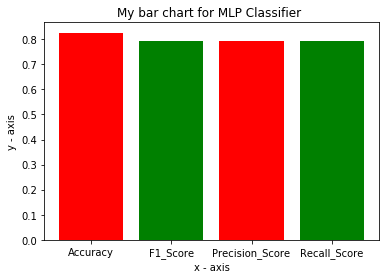

In [39]:
predicted = clf_neural.predict(X_test)
print('Accuracy:', accuracy_score(y_test,predicted))
a=(accuracy_score(y_test,predicted))
print('F1_Score:',f1_score(y_test, predicted, average="macro"))
b=(f1_score(y_test, predicted, average="macro"))
print('Precision Score:',precision_score(y_test, predicted, average="macro"))
c=(precision_score(y_test, predicted, average="macro"))
print('Recall Score:',recall_score(y_test, predicted, average="macro"))
d=(recall_score(y_test, predicted, average="macro"))

accuracy.append(a)
f1.append(b)
prec.append(c)
rec.append(d)


result_softmax = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

#graph implementation

left = [1, 2, 3, 4] 

  
# heights of bars 

height = [a, b, c, d] 

  
# labels for bars 

tick_label = ['Accuracy', 'F1_Score', 'Precision_Score', 'Recall_Score'] 

  
# plotting a bar chart 

plt.bar(left, height, tick_label = tick_label, 

        width = 0.8, color = ['red', 'green']) 

  
# naming the x-axis 

plt.xlabel('x - axis') 
# naming the y-axis 

plt.ylabel('y - axis') 
# plot title 

plt.title('My bar chart for MLP Classifier ') 

  
# function to show the plot 
plt.show() 


In [40]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

Accuracy: 0.9733774996932891
F1_Score: 0.9675999387712771
Precision Score: 0.9667959418152338
Recall Score: 0.9685145495501739
entertainment  -  entertainment
entertainment  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
us  -  us
business  -  business
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
health  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
us  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertai

health  -  health
world  -  world
world  -  world
us  -  health
sci_tech  -  sci_tech
world  -  world
entertainment  -  entertainment
business  -  business
us  -  us
sport  -  sport
business  -  business
us  -  us
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
sport  -  sport
us  -  us
entertainment  -  entertainment
business  -  business
world  -  world
world  -  world
sport  -  sport
world  -  world
us  -  us
sci_tech  -  sci_tech
sport  -  sport
world  -  world
world  -  world
us  -  us
sport  -  sport
business  -  sci_tech
world  -  world
sport  -  sport
world  -  world
business  -  business
sport  -  sport
world  -  world
us  -  business
sport  -  sport
business  -  business
health  -  health
world  -  world
world  -  world
world  -  world
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
business  -  business
world  -  world
sport  -  sport
sport  -  sport
entertainment  -  

sport  -  sport
us  -  us
business  -  business
sport  -  sport
world  -  world
world  -  world
business  -  business
world  -  world
sport  -  sport
us  -  us
us  -  us
world  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
business  -  business
business  -  business
world  -  world
us  -  us
sci_tech  -  sci_tech
health  -  health
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sci_tech  -  business
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
us  -  us
sport  -  sport
sci_tech  -  business
sport  -  sport
business  -  business
us  -  us
us  -  us
business  -  business
sport  -  sport
sport  -  sport
world  -  world
world  -  world
world  -  world
spor

world  -  world
sport  -  sport
sport  -  sport
world  -  world
us  -  us
business  -  business
business  -  business
business  -  business
world  -  world
world  -  world
world  -  world
health  -  health
business  -  business
business  -  business
world  -  world
sci_tech  -  sci_tech
sport  -  sport
world  -  world
us  -  us
sport  -  sport
business  -  business
entertainment  -  entertainment
world  -  world
health  -  health
us  -  us
sport  -  sport
business  -  business
business  -  business
us  -  us
business  -  business
sport  -  sport
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
sport  -  sport
health  -  health
sci_tech  -  sci_tech
sci_tech  -  us
sci_tech  -  sci_tech
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sci_tech  -  sci_tech
sci_tech  -  sci_tech
entertainment  -  entertainment
health  -  health
world  -  world
business  -  business
us  -  us
sci_

sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
business  -  business
entertainment  -  entertainment
business  -  business
health  -  health
sci_tech  -  sci_tech
entertainment  -  entertainment
business  -  business
sport  -  sport
entertainment  -  entertainment
business  -  business
sport  -  sport
world  -  world
entertainment  -  entertainment
sport  -  sport
business  -  business
health  -  health
us  -  us
business  -  business
sci_tech  -  sci_tech
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
sport  -  sport
entertainment  -  entertainment
us  -  us
business  -  business
world  -  world
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
sport  -  sport
us  -  us
world  -  world
us  -  us
sport  -  sport
us  -  us
sci_tech  -  sci_tech
us  -  us
sport  -  sport
world  -  world
sci_tech  -  sci_tech
business  -  business
business  -  business
world  -  world
sci_tech  -  sci_tech
business

sport  -  sport
health  -  health
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
health  -  health
us  -  us
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sci_tech  -  sci_tech
us  -  us
world  -  world
sport  -  sport
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
world  -  world
us  -  sci_tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
business  -  business
sci_tech  -  sci_tech
world  -  world
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sport  -  sport
us  -  us
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
entertainment  -  entertainment
sport  -  sport
us  -  us
world  -  world
sport 

entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
health  -  health
sport  -  sport
us  -  us
sport  -  sport
us  -  us
business  -  business
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
sci_tech  -  sci_tech
business  -  business
sci_tech  -  business
sci_tech  -  business
sport  -  sport
us  -  us
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
sci_tech  -  sci_tech
world  -  world
health  -  world
us  -  us
health  -  health
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
world  -  world
sport  -  sport
business  -  business
health  -  business
business  -  business
sci_tech  -  sci_tech
business  -  business
world  -  world
business  -  business
sport  -  sport
business  -  bu

entertainment  -  entertainment
us  -  us
sport  -  sport
business  -  business
sci_tech  -  sci_tech
business  -  business
sport  -  sport
business  -  business
us  -  us
world  -  world
sport  -  sport
business  -  business
us  -  us
world  -  world
us  -  us
sport  -  sport
us  -  us
world  -  world
health  -  health
us  -  us
world  -  world
world  -  world
business  -  business
us  -  business
us  -  us
world  -  world
business  -  business
entertainment  -  entertainment
world  -  world
world  -  world
entertainment  -  entertainment
world  -  world
health  -  health
sport  -  sport
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sci_tech  -  sci_tech
health  -  health
us  -  us
sport  -  sport
sport  -  sport
us  -  us
world  -  world
us  -  us
world  -  world
business  -  business
business  -  business
sport  -  sport
health  -  health
us  -  us
world  -  world
entertainment  -  entertainment
us  -  us
us  -  us
he

world  -  world
sport  -  sport
sport  -  sport
business  -  business
sci_tech  -  sci_tech
us  -  us
business  -  business
sport  -  sport
entertainment  -  entertainment
us  -  us
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
sport  -  sport
business  -  business
entertainment  -  entertainment
world  -  world
sport  -  sport
sci_tech  -  sci_tech
world  -  world
world  -  world
sci_tech  -  business
world  -  world
us  -  us
entertainment  -  entertainment
sci_tech  -  sci_tech
us  -  us
sport  -  sport
sci_tech  -  sci_tech
us  -  us
business  -  business
world  -  world
world  -  world
sport  -  sport
business  -  business
sport  -  sport
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
sci_tech  -  sci_tech
business  -  business
us  -  us
health  -  health
business  -  business
sport  -  sport
world  -  world
health  -  us
sci_tech  -  sci_tech
sport  -  sport
world  -  world
sport  -  sport
world  -  world
world  -  world
business  -  b

business  -  business
world  -  world
world  -  world
business  -  business
us  -  us
business  -  business
sport  -  sport
sport  -  sport
world  -  world
business  -  world
sport  -  sport
world  -  world
business  -  business
sport  -  sport
health  -  health
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
business  -  business
us  -  us
business  -  business
entertainment  -  entertainment
world  -  world
us  -  us
business  -  business
us  -  us
us  -  us
health  -  health
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
us  -  us
sci_tech  -  sci_tech
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
us  -  us
us  -  us
us  -  us
business  -  business
world  -  world
us  -  us
sport  -  sport
us  -  us
sport  -  sport
us  -  us
sport  -  sport
sport  -  sport
business  -  business
business  -  business
us  -  us
business  -  business
sci_tech  -  us
entertainment  -  entertainment
sci_tech  -  sci_

sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
business  -  business
business  -  business
us  -  us
health  -  health
sci_tech  -  sci_tech
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
health  -  health
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
business  -  business
sport  -  sport
world  -  world
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
us  -  us
business  -  business
entertainment  -  entertainment
us  -  us
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
us  -  us
business  -  business
business  -  business
sport  -  sport
business  - 

world  -  world
business  -  business
sport  -  sport
sport  -  sport
us  -  us
us  -  us
world  -  world
entertainment  -  entertainment
business  -  business
business  -  business
business  -  business
sport  -  sport
business  -  business
health  -  health
world  -  world
health  -  health
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
business  -  business
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
us  -  us
sci_tech  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
business  -  business
entertainment  -  entertainment
world  -  world
sport  -  sport
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
world  -  world
us  -  us
sport  -  sport
world  -  world
sport  -  sport
world  -  world
health  -  health
sport  -  sport
business  -  business
business  -  business
sport  -  sport
us  -  business
sport  -  sp

us  -  us
sci_tech  -  sci_tech
business  -  business
us  -  us
us  -  us
sport  -  sport
world  -  world
entertainment  -  entertainment
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
sport  -  sport
business  -  business
us  -  us
world  -  world
sport  -  sport
world  -  world
world  -  world
health  -  health
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
world  -  world
sport  -  sport
business  -  business
business  -  business
business  -  business
sport  -  sport
us  -  us
entertainment  -  entertainment
sport  -  sport
business  -  business
business  -  business
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sci_tech  -  sci_tech
world  -  world
us  -  us
sport  -  sport
us  -  us
us  -  us
sport  -  sport
health  -  health
sci_tech  -  business
us  -  us
business  -  business
sci_tech

us  -  us
us  -  us
us  -  us
sport  -  sport
sport  -  sport
sport  -  sport
business  -  business
entertainment  -  entertainment
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
health  -  health
business  -  business
sport  -  sport
entertainment  -  entertainment
sci_tech  -  sci_tech
business  -  business
world  -  world
sport  -  sport
sport  -  sport
business  -  business
sport  -  sport
us  -  us
entertainment  -  entertainment
us  -  us
health  -  health
business  -  business
entertainment  -  entertainment
us  -  us
sci_tech  -  sci_tech
entertainment  -  health
world  -  world
us  -  us
world  -  world
business  -  business
sport  -  sport
business  -  business
sport  -  sport
business  -  business
world  -  world
health  -  health
sport  -  sport
sport  -  sport
world  -  world
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
sport  -  sport
us  -  us
sci_tech  -  sci_tech
business  -  business
entertainment  -  entertainment
world  -  w

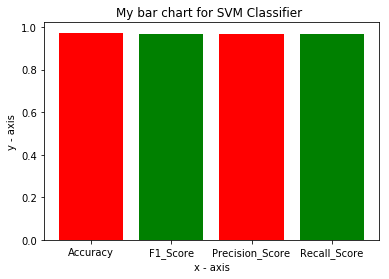

In [41]:
predicted = clf_svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test,predicted))
a=(accuracy_score(y_test,predicted))
print('F1_Score:',f1_score(y_test, predicted, average="macro"))
b=(f1_score(y_test, predicted, average="macro"))
print('Precision Score:',precision_score(y_test, predicted, average="macro"))
c=(precision_score(y_test, predicted, average="macro"))
print('Recall Score:',recall_score(y_test, predicted, average="macro"))
d=(recall_score(y_test, predicted, average="macro"))

accuracy.append(a)
f1.append(b)
prec.append(c)
rec.append(d)


result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

#graph implementation

left = [1, 2, 3, 4] 

  
# heights of bars 

height = [a, b, c, d] 

  
# labels for bars 

tick_label = ['Accuracy', 'F1_Score', 'Precision_Score', 'Recall_Score'] 

  
# plotting a bar chart 

plt.bar(left, height, tick_label = tick_label, 

        width = 0.8, color = ['red', 'green']) 

  
# naming the x-axis 

plt.xlabel('x - axis') 
# naming the y-axis 

plt.ylabel('y - axis') 
# plot title 

plt.title('My bar chart for SVM Classifier ') 

  
# function to show the plot 
plt.show() 

In [42]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('abhijeetsaraf65', 'Fvq4yMoFx64uvDa49gKi')
trace1 = {
  "x": ["MN Naive Bayes", "MLP Classifer", "SVM"], 
  "y": accuracy, 
  "name": "Accuracy", 
  "type": "bar"
}
trace2 = {
  "x": ["MN Naive Bayes", "MLP Classifer", "SVM"], 
  "y": prec, 
  "name": "Precision", 
  "type": "bar"
}
trace3 = {
  "x": ["MN Naive Bayes", "MLP Classifer", "SVM"], 
  "y": rec, 
  "name": "Recall", 
  "type": "bar"
}
trace4 = {
  "x": ["MN Naive Bayes", "MLP Classifer", "SVM"], 
  "y": f1, 
  "name": "F1 Score", 
  "type": "bar"
}
data = Data([trace1, trace2, trace3, trace4])
layout = {"barmode": "group"}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


